In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pd.set_option('display.max_columns', 500)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [116]:
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

# First I'm goin to attempt the easier method, with labaled data (supervised learning), then I will code the unsupervised method as well

# Feature engineering 

In [7]:
df_clean = df.copy()

In [8]:
df_clean.drop(columns="customerID",inplace=True) # We dont need ID of clients for predtiction

In [9]:
# Replace all the simple string values to numeric 1's and 0's 

df_clean.replace({'Male': 1, 'Female': 0}, inplace=True)
df_clean.replace({'Yes': 2, 'No': 1,'No internet service':0}, inplace=True)
df_clean

/tmp/ipykernel_2438/3865291165.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.replace({'Male': 1, 'Female': 0}, inplace=True)
/tmp/ipykernel_2438/3865291165.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.replace({'Yes': 2, 'No': 1,'No internet service':0}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,2,1,1,1,No phone service,DSL,1,2,1,1,1,1,Month-to-month,2,Electronic check,29.85,29.85,1
1,1,0,1,1,34,2,1,DSL,2,1,2,1,1,1,One year,1,Mailed check,56.95,1889.5,1
2,1,0,1,1,2,2,1,DSL,2,2,1,1,1,1,Month-to-month,2,Mailed check,53.85,108.15,2
3,1,0,1,1,45,1,No phone service,DSL,2,1,2,2,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,0,0,1,1,2,2,1,Fiber optic,1,1,1,1,1,1,Month-to-month,2,Electronic check,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,2,2,24,2,2,DSL,2,1,2,2,2,2,One year,2,Mailed check,84.80,1990.5,1
7039,0,0,2,2,72,2,2,Fiber optic,1,2,2,1,2,2,One year,2,Credit card (automatic),103.20,7362.9,1
7040,0,0,2,2,11,1,No phone service,DSL,2,1,1,1,1,1,Month-to-month,2,Electronic check,29.60,346.45,1
7041,1,1,2,1,4,2,2,Fiber optic,1,1,1,1,1,1,Month-to-month,2,Mailed check,74.40,306.6,2


In [10]:
# One hot encoding with get_dummie
# Perform one-hot encoding
df_clean = pd.get_dummies(df_clean, columns=["MultipleLines", "InternetService", "Contract", "PaymentMethod"], drop_first=True)

In [11]:
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors='coerce')
df_clean["TotalCharges"].fillna(0, inplace=True) 

/tmp/ipykernel_2438/4128232847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["TotalCharges"].fillna(0, inplace=True)


In [12]:
df_clean.info()
df_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_2,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,2,1,1,1,1,2,1,1,1,1,2,29.85,29.85,1,False,True,True,False,False,False,False,True,False
1,1,0,1,1,34,2,2,1,2,1,1,1,1,56.95,1889.50,1,False,False,True,False,True,False,False,False,True
2,1,0,1,1,2,2,2,2,1,1,1,1,2,53.85,108.15,2,False,False,True,False,False,False,False,False,True
3,1,0,1,1,45,1,2,1,2,2,1,1,1,42.30,1840.75,1,False,True,True,False,True,False,False,False,False
4,0,0,1,1,2,2,1,1,1,1,1,1,2,70.70,151.65,2,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,2,2,24,2,2,1,2,2,2,2,2,84.80,1990.50,1,True,False,True,False,True,False,False,False,True
7039,0,0,2,2,72,2,1,2,2,1,2,2,2,103.20,7362.90,1,True,False,False,True,True,False,True,False,False
7040,0,0,2,2,11,1,2,1,1,1,1,1,2,29.60,346.45,1,False,True,True,False,False,False,False,True,False
7041,1,1,2,1,4,2,1,1,1,1,1,1,2,74.40,306.60,2,True,False,False,True,False,False,False,False,True


In [13]:
# Supervised Learning


In [14]:
X = df_clean.drop(columns="Churn")
y = df_clean["Churn"]

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)
y_pred

array([1.49747665, 1.17197043, 0.96041459, ..., 1.17631409, 1.55255793,
       1.31531086])

In [71]:
print(max(y_pred),min(y_pred))

1.8099697763192122 0.80540457372328


In [68]:
# Convert continuous predictions to binary values (2 or 1)
y_pred_binary = [2 if pred >= 1.466 else 1 for pred in y_pred] # The best accuracy in this example is where treshhold is 1.46 
y_pred_binary

[2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [69]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8075


In [70]:
y_test

185     2
2715    1
3825    1
1807    2
132     1
       ..
5845    2
2301    1
5121    1
677     2
6062    1
Name: Churn, Length: 1761, dtype: int64

# On second approach we'll try unsepervisedlearnin, and I think one of the best algo, is going to be k-mean 

In [87]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(df_clean)
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [99]:
# Step 1: Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can choose any value for n_clusters
kmeans.fit(X_scaled)

# Step 3: Get cluster assignments and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Step 4: Analyze the Results
# Add the cluster labels back to the DataFrame
df_clean['Cluster'] = cluster_labels
df_clean['Cluster'].replace({0:1,1:2})

0       2
1       2
2       2
3       2
4       2
       ..
7038    2
7039    2
7040    2
7041    2
7042    2
Name: Cluster, Length: 7043, dtype: int32

In [100]:
accuracy = accuracy_score(y, cluster_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5340


In [101]:
y

0       1
1       1
2       2
3       1
4       2
       ..
7038    1
7039    1
7040    1
7041    2
7042    1
Name: Churn, Length: 7043, dtype: int64

In [103]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [104]:
X_pca

array([[-0.11628633,  0.56902398],
       [-0.48786894,  0.68617083],
       [-0.36188283,  0.36262104],
       ...,
       [-0.17769208,  0.84905694],
       [ 0.16593862, -0.73581496],
       [ 1.00043939,  0.00114351]])

In [108]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca

,PCA1,PCA2
0,-0.116286,0.569024
1,-0.487869,0.686171
2,-0.361883,0.362621
3,-0.180268,1.160371
4,0.123549,-1.069047
...,...,...
7038,0.531945,1.022636
7039,1.225819,0.239272
7040,-0.177692,0.849057
7041,0.165939,-0.735815


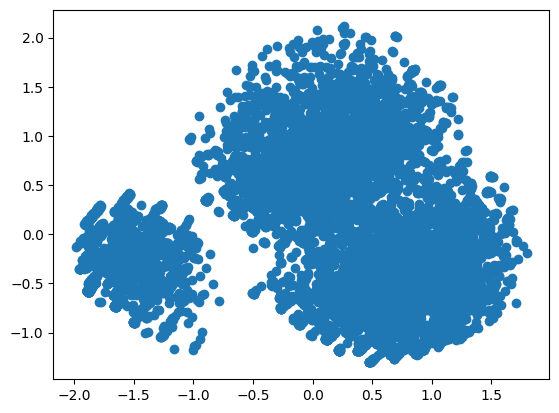

In [110]:
plt.scatter(df_pca["PCA1"],df_pca["PCA2"])

In [124]:
# Step 2: Fit K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can choose any value for n_clusters
kmeans.fit(df_pca)

# Step 3: Get cluster assignments and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Step 4: Analyze the Results
# Add the cluster labels back to the DataFrame
df_clean['Cluster'] = cluster_labels
df_clean['Cluster'].replace({0:1,1:2})

0       1
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: Cluster, Length: 7043, dtype: int32

0.22362629561266506

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Cluster, Length: 7043, dtype: int32